In [30]:
# !pip install opencv-python

In [1]:
import cv2    # for the image read
import numpy as np 
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sb

### Prepeocessing : Detect face and eyes 
#### When we look at any image, most of the time we identify a person using a face. An image might contain multiple faces, also the face can be obstructed and not clear. The first step in our pre-processing pipeline is to detect faces from an image. Once face is detected, we will detect eyes, if two eyes are detected then only we keep that image otherwise discard it

In [2]:
img = cv2.imread(".\DataSet\\sidharth malhotra\\sidharth2.jpg")
img.shape

(430, 561, 3)

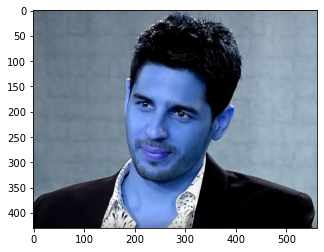

In [101]:
plt.imshow(img)

In [102]:
# remove RGB content and convert in gray image 
gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
gray.shape
# plt.imshow(img , cmap = "gray")

(430, 561)

In [3]:
# face and eye cascade Apis to detect Face and eye
face_cascade = cv2.CascadeClassifier('./OpenCV_Cascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./OpenCV_Cascades/haarcascade_eye.xml')
face_cascade

<CascadeClassifier 000001B57C2654B0>

In [7]:
faces = face_cascade.detectMultiScale(gray)
faces

array([[150, 114, 209, 209]])

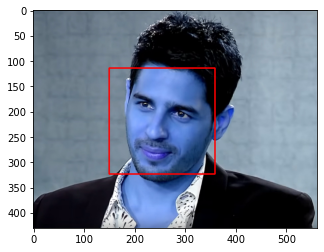

In [8]:
(x ,y ,w , h ) = faces[0]
face_img = cv2.rectangle(img , (x ,y) , (x+w , y+h) , (255 , 0 ,0),2)
plt.imshow(face_img)

[[115  63  56  56]
 [ 46  48  48  48]]


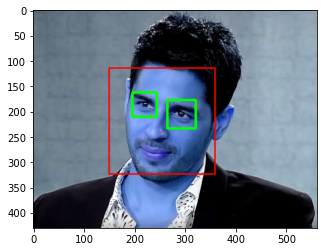

In [9]:
cv2.destroyAllWindows()
for (x ,y ,w, h) in faces:
    face_img = cv2.rectangle(img , (x ,y) , (x+w , y+h) , (255 , 0 ,0),2)
    roi_gray = gray[y:y+h , x:x+w]
    roi_color = face_img[y:y+h , x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    print(eyes)
    for (ex ,ey , ew ,eh) in eyes:
        cv2.rectangle(roi_color , (ex ,ey) , (ex+ew , ey+eh),(0,255,0),3)
plt.figure()
plt.imshow(face_img , cmap = 'gray')
plt.show()

### Preprocessing :crop the facial region of the image 

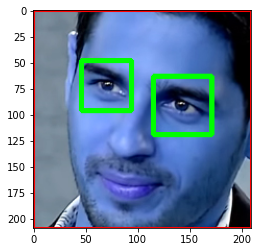

In [10]:
plt.imshow(roi_color , cmap = 'gray')

In [40]:
cropped_img = np.array(roi_color)
cropped_img.shape

(209, 209, 3)

In [11]:
#  create function that can read image and crope it around face area

def get_cropped_img_if_2_eyes(image_path):
    cv2.destroyAllWindows()
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray , 1.3 , 5 )
    for (x , y, w ,h ) in faces:
#         face_img = cv2.rectangle(img , (x ,y ) , (x+w ,y+h) , (255 ,0 ,0), 4 )
        roi_gray = gray[y:y+h , x:x+w]
        roi_color = img[y:y+h , x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
#         print(eyes)
        if len(eyes) >= 2:
            return roi_color

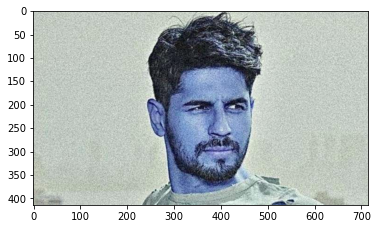

In [42]:
org_img = cv2.imread(".\DataSet\\sidharth malhotra\\sidharth3.jpg") 
plt.imshow(org_img)
plt.show()

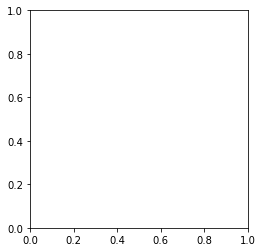

In [43]:
try:
    crop_img = get_cropped_img_if_2_eyes(".\DataSet\\sidharth malhotra\\sidharth3.jpg")
    plt.imshow(crop_img)
except:
    pass

In [12]:
# get the path of all folder in data set 
path_to_dataSet = "./DataSet/"
path_to_cr_data = "./DataSet/Cropped/"
img_dirs = []
for entry in os.scandir(path_to_dataSet):
    if entry.is_dir():
        img_dirs.append(entry.path)
img_dirs

['./DataSet/Akshay kumar',
 './DataSet/aliya bhatt',
 './DataSet/Cropped',
 './DataSet/deepika padukone',
 './DataSet/kiara advani',
 './DataSet/sidharth malhotra',
 './DataSet/varun dhawan',
 './DataSet/virat kohli']

In [47]:
# if we have alreade cropped folder then dont run this code otherwise it delete that folder then it then after we have to again clean data 
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

## So here we code the processing steps that take picture 1 by 1 from path and then cut that face and save it in other folder 

## I commenting below code after saving cropped inmage in other folder so then after cleaning unwanted cropped image we not able to  again put images in cropped folder again and again 

In [48]:
# cropped_image_dirs = []       # store the path of al cropfolder directeries
# celebrity_names_file_dict = {}     # in this dictionary we store the all cropped image path with that celebreti name 

# for img_dir in img_dirs:
#     count = 1
#     celebrity_name = img_dir.split('/')[-1]
#     print(celebrity_name)
#     celebrity_names_file_dict[celebrity_name] = []
#     for entry in os.scandir(img_dir):
#         try:
#             roi_color = get_cropped_img_if_2_eyes(entry.path)
#         except:
#             pass
#         if roi_color is not None:
#             cropped_folder = path_to_cr_data + celebrity_name
#             if not os.path.exists(cropped_folder):
#                 os.makedirs(cropped_folder)
#                 cropped_image_dirs.append(cropped_folder)
#                 print("Generating cropped images in folder: ",cropped_folder)
#             cropped_file_name = celebrity_name + str(count) + ".png"
#             cropped_file_path = cropped_folder + "/" + cropped_file_name
            
#             cv2.imwrite(cropped_file_path , roi_color)
#             celebrity_names_file_dict[celebrity_name].append(cropped_file_path)
#             count+=1
        

Akshay kumar
Generating cropped images in folder:  ./DataSet/Cropped/Akshay kumar
aliya bhatt
Generating cropped images in folder:  ./DataSet/Cropped/aliya bhatt
deepika padukone
Generating cropped images in folder:  ./DataSet/Cropped/deepika padukone
kiara advani
Generating cropped images in folder:  ./DataSet/Cropped/kiara advani
sidharth malhotra
Generating cropped images in folder:  ./DataSet/Cropped/sidharth malhotra
varun dhawan
Generating cropped images in folder:  ./DataSet/Cropped/varun dhawan
virat kohli
Generating cropped images in folder:  ./DataSet/Cropped/virat kohli


### if we have already clean data than after run this code other wise run above code 
### so that ge get the path of that photos and stored path in dict 

In [112]:
cr_img_dir = []
if os.path.exists(path_to_cr_data):
    for entry in os.scandir(path_to_cr_data):
        if entry.is_dir():
            cr_img_dir.append(entry.path)
            
            
clean_data_dict = {}
for img_path in cr_img_dir:
    celebrity_name = img_path.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_path):
        file_list.append(entry.path)
    clean_data_dict[celebrity_name] = file_list
# clean_data_dict

## Preprocessing: Use wavelet transform as a feature for traning our model
### In wavelet transformed image, you can see edges clearly and that can give us clues on various facial features such as eyes, nose, lips etc

### wavelet Transform 

In [15]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

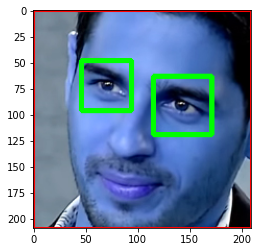

In [16]:
#c_img = ".\DataSet\Cropped\sidharth malhotra\sidharth malhotra2.PNG"
plt.imshow(roi_color)

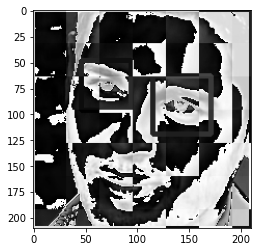

In [17]:
im_har = w2d(roi_color,'db1',5)
plt.imshow(im_har, cmap='gray')

## After cleaning Manually cropped image and delete any unwanted images
#### we again get the path of that clean image and then stored in dict

In [49]:
cropped_image_dirs

['./DataSet/Cropped/Akshay kumar',
 './DataSet/Cropped/aliya bhatt',
 './DataSet/Cropped/deepika padukone',
 './DataSet/Cropped/kiara advani',
 './DataSet/Cropped/sidharth malhotra',
 './DataSet/Cropped/varun dhawan',
 './DataSet/Cropped/virat kohli']

In [52]:
celebrity_file_clean_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_clean_dict[celebrity_name] = file_list
celebrity_file_clean_dict

{'Akshay kumar': ['./DataSet/Cropped/Akshay kumar\\Akshay kumar1.png',
  './DataSet/Cropped/Akshay kumar\\Akshay kumar10.png',
  './DataSet/Cropped/Akshay kumar\\Akshay kumar11.png',
  './DataSet/Cropped/Akshay kumar\\Akshay kumar12.png',
  './DataSet/Cropped/Akshay kumar\\Akshay kumar13.png',
  './DataSet/Cropped/Akshay kumar\\Akshay kumar14.png',
  './DataSet/Cropped/Akshay kumar\\Akshay kumar15.png',
  './DataSet/Cropped/Akshay kumar\\Akshay kumar16.png',
  './DataSet/Cropped/Akshay kumar\\Akshay kumar17.png',
  './DataSet/Cropped/Akshay kumar\\Akshay kumar18.png',
  './DataSet/Cropped/Akshay kumar\\Akshay kumar19.png',
  './DataSet/Cropped/Akshay kumar\\Akshay kumar2.png',
  './DataSet/Cropped/Akshay kumar\\Akshay kumar21.png',
  './DataSet/Cropped/Akshay kumar\\Akshay kumar22.png',
  './DataSet/Cropped/Akshay kumar\\Akshay kumar23.png',
  './DataSet/Cropped/Akshay kumar\\Akshay kumar24.png',
  './DataSet/Cropped/Akshay kumar\\Akshay kumar26.png',
  './DataSet/Cropped/Akshay kumar\

In [54]:
celebrity_file_clean_dict.keys()

dict_keys(['Akshay kumar', 'aliya bhatt', 'deepika padukone', 'kiara advani', 'sidharth malhotra', 'varun dhawan', 'virat kohli'])

In [19]:
# if we run this code at first time theen useing this dict (celebrity_file_clean_dict)

# class_dict = {}
# count = 0 
# for name in celebrity_file_clean_dict.keys():
#     class_dict[name] = count
#     count = count + 1
# class_dict


# if we have the already clean data so that we dont need to clean again this 
# data we want ontly path od that image so that we useing this dict clean_data_dict 
class_dict = {}
count = 0 
for name in clean_data_dict.keys():
    class_dict[name] = count
    count = count + 1
class_dict


{'Akshay kumar': 0,
 'aliya bhatt': 1,
 'deepika padukone': 2,
 'kiara advani': 3,
 'sidharth malhotra': 4,
 'varun dhawan': 5,
 'virat kohli': 6}

In [21]:
# if we run this code at first time theen useing this dict (celebrity_file_clean_dict)


# X , y = [] ,[]
# for celebrityName , training_files in celebrity_file_clean_dict.items():
#     for training_image in training_files:
#         img = cv2.imread(training_image)
#         scalled_raw_img = cv2.resize(img, (32, 32))
#         img_har = w2d(img,'db1',5)
#         scalled_img_har = cv2.resize(img_har, (32, 32))
#         combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
#         X.append(combined_img)
#         y.append(class_dict[celebrityName])



# if we have the already clean data so that we dont need to clean again this 
# data we want ontly path od that image so that we useing this dict clean_data_dict 

X , y = [] ,[]
for celebrityName , training_files in clean_data_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrityName])

In [22]:
len(X)

260

In [103]:
len(X[0])

4096

In [24]:
32*32*3 + 32*32


4096

In [25]:
X[0]

array([[  1],
       [  1],
       [  1],
       ...,
       [203],
       [ 44],
       [  8]], dtype=uint8)

In [26]:
y[0]

0

In [27]:
X = np.array(X).reshape(len(X) , 4096).astype(float)
X.shape

(260, 4096)

### Train Model 

In [113]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [118]:
xtrain ,xtest , ytrain , ytest = train_test_split(X , y , random_state = 10 , test_size = 0.2)
pipe = Pipeline([('scaler' , StandardScaler()) , ('svc' , SVC(kernel = 'linear' , C = 1))])
pipe.fit(xtrain , ytrain)
pipe.score(xtest , ytest)

0.6346153846153846

In [119]:
y_pred = pipe.predict(xtest)
y_pred

array([5, 5, 6, 1, 4, 6, 5, 3, 1, 6, 1, 5, 1, 3, 1, 3, 1, 3, 5, 5, 1, 2,
       3, 1, 1, 0, 1, 0, 1, 1, 3, 6, 1, 4, 4, 5, 2, 6, 5, 1, 2, 6, 0, 1,
       5, 0, 4, 3, 3, 1, 4, 4])

In [120]:
print(ytest)

[5, 5, 5, 1, 2, 6, 5, 1, 1, 6, 4, 5, 1, 0, 1, 3, 3, 1, 4, 5, 1, 2, 1, 2, 1, 0, 4, 0, 1, 1, 3, 6, 1, 4, 5, 5, 2, 6, 5, 0, 5, 6, 0, 1, 5, 0, 5, 5, 1, 2, 0, 4]


In [121]:
print(classification_report(ytest , y_pred))

              precision    recall  f1-score   support

           0       1.00      0.57      0.73         7
           1       0.62      0.71      0.67        14
           2       0.67      0.40      0.50         5
           3       0.25      0.67      0.36         3
           4       0.33      0.40      0.36         5
           5       0.89      0.62      0.73        13
           6       0.83      1.00      0.91         5

    accuracy                           0.63        52
   macro avg       0.66      0.62      0.61        52
weighted avg       0.72      0.63      0.65        52



### Let's use GridSearch to try out different models with different paramets. Goal is to come up with best modle with best fine tuned parameters

In [36]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV


In [37]:
model_params = {
    'svm':{
        'model' : svm.SVC(gamma = 'auto' , probability=True),
        'params': {
            'svc__C' : [1,10 ,100 ,1000],
            'svc__kernel' : ['rbf' , 'linear']
        }
    } ,
    'random_forest':{
        'model' : RandomForestClassifier(),
        'params': {
           'randomforestclassifier__n_estimators': [1,5,10]
        }
    } ,
    'logistic_regression':{
        'model' : LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C' : [1,5,10]
        }
    }
}

In [38]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(xtrain, ytrain)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.615165,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.362462,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.648799,{'logisticregression__C': 1}


In [39]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [40]:
best_estimators['svm'].score(xtest,ytest)

0.6666666666666666

In [41]:
best_estimators['random_forest'].score(xtest,ytest)

0.4358974358974359

In [42]:
best_estimators['logistic_regression'].score(xtest,ytest)

0.6794871794871795

In [43]:
best_clf = best_estimators['svm']
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, best_clf.predict(xtest))
cm

array([[ 5,  1,  1,  1,  0,  1,  0],
       [ 1, 13,  0,  5,  0,  0,  0],
       [ 0,  0,  6,  0,  1,  0,  0],
       [ 0,  1,  0,  6,  0,  0,  0],
       [ 0,  2,  0,  1,  6,  1,  1],
       [ 0,  1,  1,  1,  2, 11,  3],
       [ 0,  0,  0,  0,  1,  0,  5]], dtype=int64)

Text(42.0, 0.5, 'Truth')

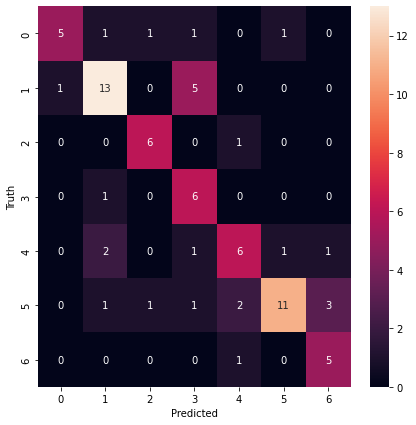

In [44]:
import seaborn as sn
plt.figure(figsize = (7,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Model building Usind CNN 

In [109]:
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers , datasets , models

### So we can not send xtrain as input because its flatten data like 1D array bt in CNN we want 2D array so that we again read all image and put it in the array so we can store it 

In [58]:
# from skimage.transform import resize
# cnn_Input = []
# cnn_target = []
# for key in class_dict.keys():
#     target = class_dict[key]
#     path = os.path.join(path_to_cr_data , key)
#     for img in os.listdir(path):
#         x = cv2.imread(os.path.join(path,img))
#         x_resize = resize(x , (32 , 32 ,3))
#         cnn_Input.append(x_resize)
#         cnn_target.append(target)
# cnn_Input = np.array(cnn_Input)
# cnn_target = np.array(cnn_target)

In [108]:
# cnn_Input.shape

In [90]:
# from sklearn.model_selection import train_test_split
# x_train , x_test , y_train , y_test = train_test_split(cnn_Input , cnn_target ,  test_size = 0.3 , random_state = 10) 

In [107]:
# cnnModel = models.Sequential([
    
# #     CNN Layers 
#     layers.Conv2D(filters = 100 , kernel_size=(3,3) , activation = 'relu' , input_shape = (32,32,3)),
#     layers.MaxPooling2D((2,2,)),
    
#     layers.Conv2D(filters = 56 , kernel_size=(3,3) , activation = 'relu' , input_shape = (32,32,3)),
#     layers.MaxPooling2D((2,2,)),
    
# #     layers.Conv2D(filters = 56 , kernel_size=(3,3) , activation = 'relu' , input_shape = (50,50,3)),
# #     layers.MaxPooling2D((2,2,)),
    
# #     ANN Layers 
#     layers.Flatten(input_shape = (32 , 32,3)),
#     layers.Dense(260 , activation = 'relu'),
#     layers.Dense(120 , activation = 'relu'),
# #     layers.Dense(60 , activation = 'relu'),
#     layers.Dense(14 , activation = 'relu'),
#     layers.Dense(7 , activation = 'sigmoid')

# ])

# cnnModel.compile(
#     optimizer = 'adam',
#     loss = 'sparse_categorical_crossentropy',
#     metrics = ['accuracy']
# )

# cnnModel.fit(x_train, y_train , epochs = 40)

In [105]:
# cnnModel.evaluate(x_test , y_test)

In [106]:
# yPredCnn = cnnModel.predict(x_test)
# ypredicted_labels = [np.argmax(x) for x in yPredCnn]
# cnn_conf = confusion_matrix(ypredicted_labels , y_test)
# plt.figure(figsize=(5,5))
# sb.heatmap(cnn_conf , annot=True ,fmt='d')
# plt.xlabel('Predicted')
# plt.ylabel("Truth")

### Improve the Accuracy using Data Augmentation

In [104]:
# data_augmentation = models.Sequential([
#         layers.experimental.preprocessing.RandomFlip('horizontal' , input_shape = (32 , 32 , 3)),
#         layers.experimental.preprocessing.RandomRotation(0.2),
# #         layers.experimental.preprocessing.RandomTranslation(0.1),
#         layers.experimental.preprocessing.RandomFlip()
        
# ])
# cnnModel_augme = models.Sequential([
#     data_augmentation,
# #     CNN Layers 
#     layers.Conv2D(filters = 200 , kernel_size=(3,3) , activation = 'relu' , input_shape = (32,32,3)),
#     layers.MaxPooling2D((2,2,)),
    
#     layers.Conv2D(filters = 100 , kernel_size=(3,3) , activation = 'relu' , input_shape = (32,32,3)),
#     layers.MaxPooling2D((2,2,)),
    
# #     layers.Conv2D(filters = 56 , kernel_size=(3,3) , activation = 'relu' , input_shape = (50,50,3)),
# #     layers.MaxPooling2D((2,2,)),
    
# #     ANN Layers 
#     layers.Flatten(input_shape = (32 , 32,3)),
#     layers.Dense(260 , activation = 'relu'),
# #     layers.Dense(120 , activation = 'relu'),
#     layers.Dense(60 , activation = 'relu'),
# #     layers.Dense(14 , activation = 'relu'),
#     layers.Dense(7 , activation = 'sigmoid')

# ])

# cnnModel_augme.compile(
#     optimizer = 'adam',
#     loss = 'sparse_categorical_crossentropy',
#     metrics = ['accuracy']
# )

# cnnModel_augme.fit(x_train, y_train , epochs = 50)

In [110]:
# cnnModel_augme.evaluate(x_test , y_test)